In [ ]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import itertools
import matplotlib as mpl
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from google.colab import drive





In [ ]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


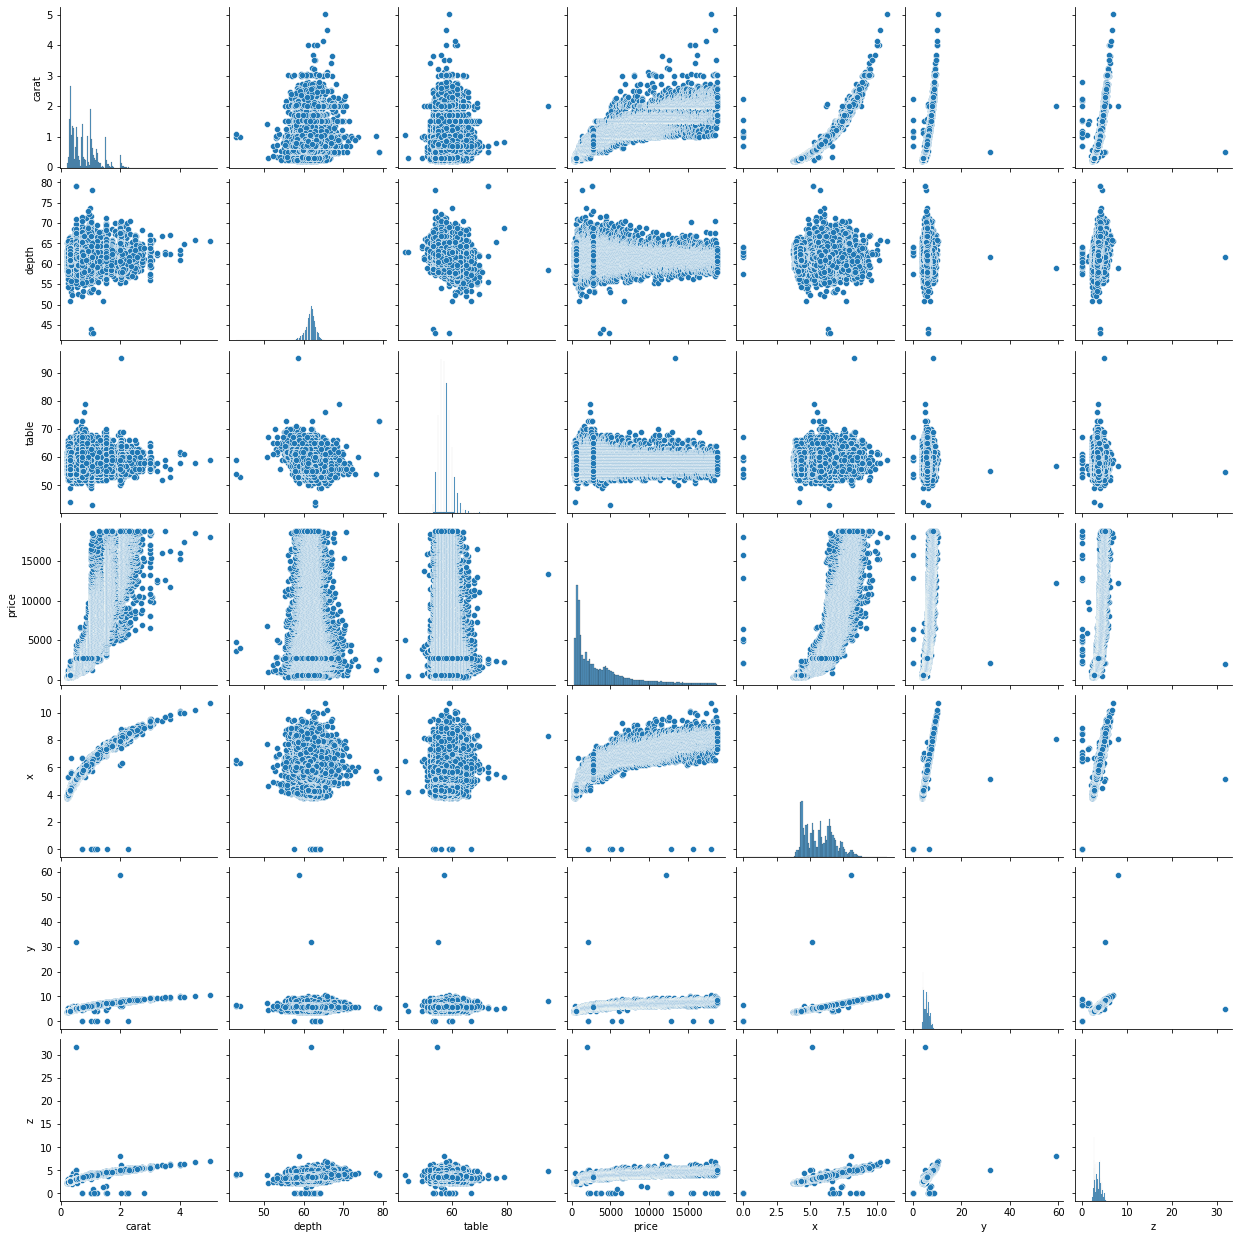

In [ ]:
df1=sns.load_dataset('diamonds')
df= df1.select_dtypes(include='number') # keep only numeric variables
dfone = df.dropna() # remove observations with NaNs


sns.pairplot(dfone)

In [ ]:
dfone

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
XS = StandardScaler().fit_transform(dfone)
n_variables = df.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)
print('pca.explained_variance ={}'.format(100*pca.explained_variance_ratio_.cumsum()))
a=pca.explained_variance_ratio_.cumsum()


pca.explained_variance =[ 68.05592578  86.42546975  96.29420208  98.77639255  99.35220996
  99.82287554 100.        ]


In [ ]:
ndim_reducida=1
for i in range(a.size):
    while a[i] < 0.95:
        ndim_reducida = ndim_reducida+1
        break
print('nbre de dimension =',ndim_reducida)
Xproj = pca.transform(XS)
XPCA = Xproj[:,0:ndim_reducida]
print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))


nbre de dimension = 3
Dimensionalidad datos en espacio PCA reducido = (53940, 3)


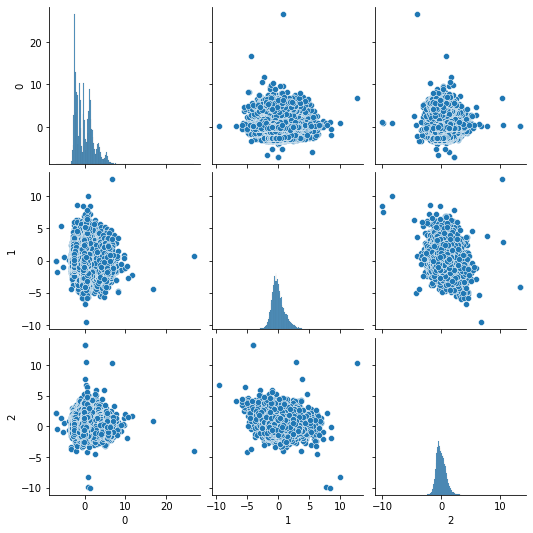

In [ ]:
d = pd.DataFrame(XPCA)
sns.pairplot(d)

In [ ]:
df1

Y=d.copy()
X=d.copy()
Z=d.copy()

GaussianMixture(n_components=18)


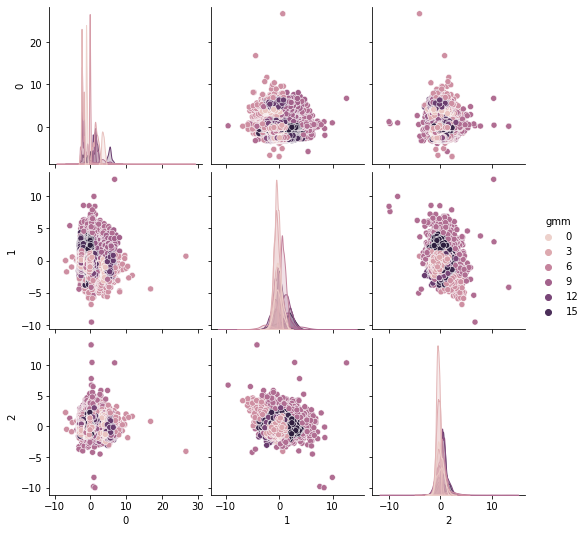

In [ ]:

lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            n=n_components
print(best_gmm)

gm=best_gmm.fit_predict(Y)
Y['gmm'] = gm
h=sns.pairplot(Y, hue='gmm')



In [ ]:
Y

,0,1,2,gmm
0,-3.143456,-0.410706,-0.732095,2
1,-3.049138,2.285196,0.426760,15
2,-2.695226,4.972220,0.351300,8
3,-2.627002,0.008168,0.657749,6
4,-2.428992,-0.466811,1.076289,11
...,...,...,...,...
53935,-0.226451,0.367198,-0.566921,4
53936,-0.275640,-1.424197,-0.129628,4
53937,-0.142984,0.246935,1.360456,4
53938,0.405843,0.528711,-0.166478,3


In [ ]:
clustering = AgglomerativeClustering(n_clusters=n).fit(X)
labels = clustering.fit_predict(X)
X['HC'] = labels
f=sns.pairplot(X, hue='HC')
#from scipy.cluster.hierarchy import dendrogram, linkage
#Z = linkage(X)
#dendrogram(Z)

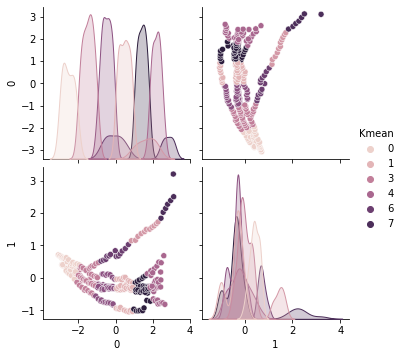

In [ ]:
kmeans = KMeans(n_clusters=n).fit_predict(Z)
Z['Kmean'] = kmeans
f=sns.pairplot(Z, hue='Kmean')

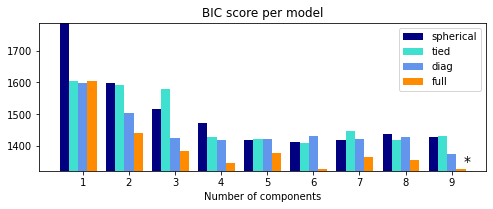

In [ ]:
bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)
